## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
from keras.utils import to_categorical

# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

print(x_train.shape)
# 將目標轉為 one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

(50000, 32, 32, 3)
(50000, 3072)


In [5]:
from keras.layers import Input, Dense
from keras.models import Model
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = Input([x_train.shape[-1]])
    x = Dense(512, activation="relu")(input_layer)
    x = Dense(256, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    output_layer = Dense(10, activation="softmax")(x)
    
    model = Model(inputs=[input_layer], outputs=[output_layer])
    return model
model = build_mlp()

W0325 22:25:32.834776 23036 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0325 22:25:32.835777 23036 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0325 22:25:32.837786 23036 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
"""
Compile 模型
"""
from keras import optimizers

# 用 Keras 內建方法檢視模型各層參數量
model.summary()

model.compile(optimizer=optimizers.SGD(lr=0.001),
              loss="categorical_crossentropy", 
              metrics=["accuracy"])

W0325 22:25:32.931799 23036 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0325 22:25:32.936800 23036 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
設定要訓練的 Epoch 數
"""
history = model.fit(x_train, y_train, 
                    epochs=500, 
                    batch_size=256, 
                    validation_data=(x_test, y_test),
                    shuffle=True)

W0325 22:25:32.994813 23036 deprecation.py:323] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0325 22:25:33.028820 23036 deprecation_wrapper.py:119] From C:\Users\henry\Anaconda3\envs\finlab\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.2598 - acc: 0.1552 - val_loss: 2.1982 - val_acc: 0.2017
Epoch 2/500
50000/50000 [==============================] - 2s 36us/step - loss: 2.1592 - acc: 0.2315 - val_loss: 2.1281 - val_acc: 0.2427
Epoch 3/500
50000/50000 [==============================] - 2s 35us/step - loss: 2.1003 - acc: 0.2592 - val_loss: 2.0771 - val_acc: 0.2700
Epoch 4/500
50000/50000 [==============================] - 2s 36us/step - loss: 2.0549 - acc: 0.2761 - val_loss: 2.0364 - val_acc: 0.2854
Epoch 5/500
50000/50000 [==============================] - 2s 35us/step - loss: 2.0185 - acc: 0.2901 - val_loss: 2.0045 - val_acc: 0.2989
Epoch 6/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.9892 - acc: 0.3028 - val_loss: 1.9781 - val_acc: 0.3047
Epoch 7/500
50000/50000 [==============================] - 2s 36us/step - loss: 1.9644 - acc: 0.3118 - val_loss: 1.9557 - 

Text(0.5, 1.0, 'Accuracy')

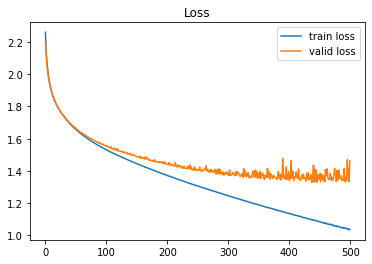

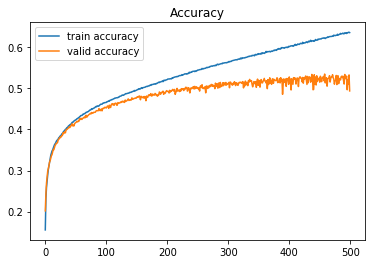

In [8]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]

train_acc = history.history["acc"]
valid_acc = history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")

plt.figure()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")